### Problem 1

( 1 ) Show that $X ∼ N (0, 1)$ is the maximum entropy distribution such that $EX = 0$ and $EX^2 = 1$.

( 2 ) Generalize the result in (1) for the maximum entropy distribution given the first k moments, i.e., $EX^i = m_i, i = 1, . . . , k.$

( 1 ) 目标是是寻找密度函数p(x)，使得下式最小：
$$
\int_R p(x)logp(x)\,dx\\
s.t. \int_R p(x)\,dx=1, \int_R xp(x)\,dx=0, \int_R x^2p(x)\,dx=1
$$
用Lagrange乘子法，上述约束问题等价于求$\hat p$，使得：
$$
L(p, \lambda)=\int_R p(x)logp(x)\,dx+\lambda_1(\int_R p(x)\,dx-1)+\lambda_2(\int_R xp(x)\,dx)+
\lambda_3(\int_R x^2p(x)\,dx-1)\\
\frac{\partial L}{\partial p}=0
$$
解出上述方程组，可以得到：
$$
\hat p=\frac{1}{\sqrt{2\pi}}exp({-\frac{1}{2}x^2})
$$
即最大熵分布是$N(0, 1)$

( 2 ) 推广上述做法，引入$k+1$个约束条件，并解方程组可得到：
$$
\hat p=C exp(-\sum_{i=1}^{k}\lambda_i x^i)
$$
将$\hat p$代入约束条件可解出$\lambda_i$

### Problem 2

(1) 考虑标准型：$b(\theta_i)=\theta_i$，由指数族分布的性质有：
$$ \mu_i = -c^{'}(\theta_i) \qquad var(Y_i)=-c^{''}(\theta_i) $$
对数似然函数：
$$L(y,\theta)=\sum^{n}_{i=1}\log {p(y_i,\theta_i)}=\sum^{n}_{i=1}{y_i\theta_i+c(\theta_i)+d(y_i)}$$
求偏导数：
$${\begin{aligned}s_j&={\frac {\partial L}{\partial \beta _{j}}}=\sum^{n}_{i=1}
{\frac {\partial L}{\partial \theta _{i}}}{\frac {\theta _{i}}{\partial \mu _{i}}}
{\frac {\mu _{i}}{\partial \eta _{i}}}{\frac {\eta _{i}}{\partial \beta _{i}}} \\
&=\sum^{n}_{i=1}{\frac {(y-\mu _{i})x_{ij}}{var(Y_i)}}{\frac {\mu _{i}}{\partial \eta _{i}}}
\end{aligned}}$$

(2)由上题结果：
$$
{\begin{aligned}I_{jk}=E(s_js_k)
&=\sum^{n}_{i=1}\sum^{n}_{l=1}E{\frac {(y_i-\mu _{i})x_{ij}}{var(Y_i)}}{\frac {\partial \mu _{i}}{\partial \eta _{i}}}{\frac {(y_l-\mu _{l})x_{lk}}{var(Y_l)}}{\frac {\partial \mu _{l}}{\partial \eta _{i}}}\\
&=\sum^{n}_{i=1}{\frac{E(y_i-\mu _{i})(y_i-\mu _{i}) x_{ij}x_{ik}}{var(Y_i)var(Y_i)}
(\frac {\partial \mu _{i}}{\partial \eta _{i}})^2
}\\
&=\sum^{n}_{i=1}{\frac{x_{ij}x_{ik}}{var(Y_i)}
(\frac {\partial \mu _{i}}{\partial \eta _{i}})^2
}
\end{aligned}}
$$

### Problem 3

(1) Generate n = 100 observations Y following the logistic regression model with true
parameter $β_0 = (−2, 1)$.

In [1]:
import numpy as np
np.random.seed(1234)
n = 100
X = np.random.normal(size=(n,2))
beta = np.array([-2.0, 1.0])
P = 1/(1+np.exp(-X@beta))  # 正类概率
def trial(p):
    return np.random.binomial(1, p)
Y = trial(P)

In [2]:
Y # 生成的100个观察值

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

(2) Find the MLE using the iteratively reweighted least square algorithm

In [3]:
from numpy.linalg import inv, norm
def p(X, beta):
    return 1/(1+np.exp(-X@beta))
# 计算Hessian matrix
def W(X, beta):
    P = p(X, beta)
    return np.diagflat(P*(1-P))

In [4]:
beta_new = np.array([0, 0])
# Newton法求MLE
for i in range(100):
    beta_new = beta_new + inv(X.T@W(X, beta_new)@X)@X.T@(Y-p(X, beta_new))
beta_new  # 参数估计值

array([-1.37086595,  0.66987777])

(3) Repeat (1) and (2) for 100 instances. Compare the MLEs with the asymptotical
distribution $βˆ ∼ N (β_0, I^{−1}(β_0))$. Present your result with a scatter plot for MLEs with
contours for the pdf of the asymptotical distribution.

In [27]:
beta_result = np.empty(shape=(100, 2))
np.random.seed(1234)
n = 100
X = np.random.normal(size=(n,2))
P = 1/(1+np.exp(-X@beta))  # 正类概率
for i in range(100):
    Y = trial(P)  # 按照 β = (−2, 1)生成样本
    beta_new = np.array([0, 0])  # 搜索起点
    for j in range(100):
        fisher = inv(X.T@W(X, beta_new)@X)  # fisher信息
        beta_new = beta_new + fisher@X.T@(Y-p(X, beta_new))
    beta_result[i] = beta_new

In [6]:
np.mean(beta_result, axis=0)

array([-2.19250614,  1.07360059])

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import multivariate_normal
from matplotlib import cm

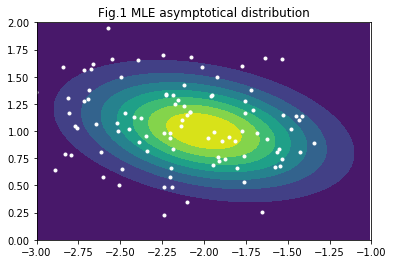

In [17]:
# 初始化网格点
x, y = np.mgrid[-3:-1:.01, 0:2:.01]
pos = np.dstack((x, y))
beta0 = np.array([-2, 1])  # 期望
fisher = inv(X.T@W(X, beta0)@X)  # 协方差矩阵
rv = multivariate_normal(beta0, fisher)  # 二元正态
# Fig.1
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.contourf(x, y, rv.pdf(pos))
ax1.scatter(beta_result[:, 0], beta_result[:, 1], marker='.', c='white')
plt.xlim(-3, -1)
plt.ylim(0, 2)
plt.title("Fig.1 MLE asymptotical distribution")
plt.show()

(4)Try the same for n = 10000. Does the asymptotical distribution provide a better fit to the MLEs? You can use the empirical covariance matrix of the MLEs for comparison

In [18]:
np.random.seed(1234)
n = 1000
X = np.random.normal(size=(n,2))
P = 1/(1+np.exp(-X@beta))  # 正类概率
beta_result = np.empty(shape=(100, 2))
for i in range(100):
    # 实例
    Y = trial(P)  # 按照 β = (−2, 1)生成样本
    beta_new = np.array([0, 0])  # 搜索起点
    for j in range(100):
        fisher = inv(X.T@W(X, beta_new)@X)  # fisher信息
        beta_new = beta_new + fisher@X.T@(Y-p(X, beta_new))
    beta_result[i] = beta_new

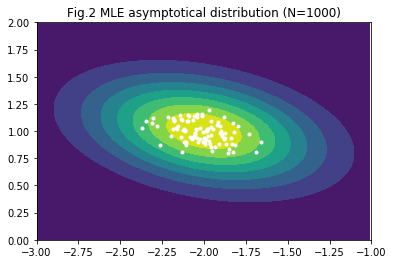

In [22]:
# Fig.2
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.contourf(x, y, rv.pdf(pos))
ax1.scatter(beta_result[:, 0], beta_result[:, 1], marker='.', c='white')
plt.xlim(-3, -1)
plt.ylim(0, 2)
plt.title("Fig.2 MLE asymptotical distribution (N=1000)")
plt.show()

> **因为这台电脑N=10000时计算速度太慢，所以采用N=1000替代，从Fig2可以看出此时MLE估计值的方差更小：**

In [25]:
np.cov(beta_result, rowvar=False)  # N=1000时的 empirical covariance matrix

array([[ 0.01908527, -0.00500837],
       [-0.00500837,  0.00916703]])

In [28]:
np.cov(beta_result, rowvar=False)  # N=100时的 empirical covariance matrix

array([[ 0.25623927, -0.04276872],
       [-0.04276872,  0.12578528]])

### Problem 4

(1) Find the global minima and show the contour plot over [−4, 4] × [−4, 4].

In [19]:
# 目标函数
def f(X):
    x = X[0]
    y = X[1]
    return (1.5-x+x*y)**2+(2.25-x+x*y**2)**2+(2.625-x+x*y**3)**2

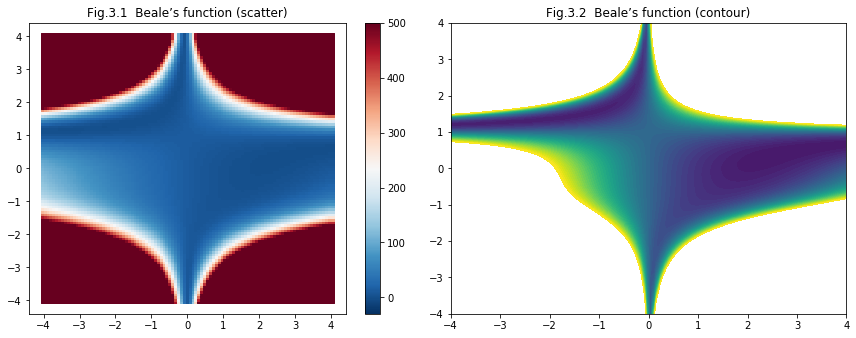

In [54]:
fig3 = plt.figure(figsize=(12, 4.8))
ax = fig3.add_subplot(121)
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
mesh = np.meshgrid(x, y)
Z = f(mesh)
layer = ax.scatter(mesh[0], mesh[1], c=Z, 
           vmin=-30, vmax=500, 
           cmap='RdBu_r', marker=',')
plt.colorbar(layer)
plt.title("Fig.3.1  Beale’s function (scatter)")
ax2 = fig3.add_subplot(122)
ax2.contourf(x, y, Z, levels=np.arange(-3, 50, 1))
plt.title("Fig.3.2  Beale’s function (contour)")
plt.tight_layout()
plt.show()

> **其全局最小值为0， 在x=(3, 0.5) 处取得**

(2) Compare gradient descent, gradient descent with momentum and nesterov’s accelerated gradient descent. Plot $f − f^∗$ as a function of the number of iterations

In [61]:
# f(x)的导数
def df(X):
    der = np.zeros_like(X)
    y = X[1]
    x = X[0]  
    der[0] = 2*(1.5-x+x*y)*(y-1)+ \
            2*(2.25-x+x*y**2)*(y**2-1)+ \
            2*(2.625-x+x*y**3)*(y**3-1)
    der[1] = 2*(1.5-x+x*y)*(x)+ \
        2*(2.25-x+x*y**2)*(2*x*y)+ \
        2*(2.625-x+x*y**3)*(3*x*y**2)
    return der      

In [97]:
class Optimize:
    def __init__(self):
        self.MINIMIZE_METHODS = ['gd', 'nesterov', 'ada-grad', 'rms-prop', 'adam',
                                 'sgd']

    def minimize(self, f, df, x0, method="gd", **options):
        """
        优化器,实现了几种常用的优化算法
        :param f: 目标函数
        :param df: 导数
        :param x0: 搜索起点
        :param method: 算法
        :param options: 算法的参数
        :return: None
        """
        if method not in self.MINIMIZE_METHODS:
            raise ValueError('Unknown solver %s' % method)
        elif method == "nesterov":
            return self._nesterov(f, df, x0, **options)
        else:
            return self._minimize(f, df, x0, method, **options)

    def _minimize(self, f, df, x0, method, learning_rate=0.05, momentum=0,
                  max_iter=200, random_state=0.01, decay_rate=0.9):

        x = x0
        m = 0  # 动量初始化
        v = 0  # 方差
        x_val = np.zeros(shape=(max_iter, x0.shape[0]))
        gradients = np.zeros(shape=(max_iter, x0.shape[0]))
        f_val = np.zeros(shape=(max_iter, 1))
        rms = np.zeros(shape=x0.shape)
        x_val[0] = x0
        f_val[0] = f(x0)
        gradients[0] = df(x0)
        i = 1
        while i < max_iter:
            if method == "gd":
                m = momentum * m + (1 - momentum) * df(x)
                update = - learning_rate * m
            elif method == "sgd":
                m = momentum * m + (1 - momentum) * (df(x) + np.random.normal(0, random_state, 2))
                update = - learning_rate * m
            elif method == "rms-prop":
                gradient = df(x) + np.random.normal(0, random_state, 2)
                # 更新学习率
                rms = decay_rate * rms + (1 - decay_rate) * np.power(gradient, 2)
                gradients[i] = gradient
                update = - learning_rate * gradient / (np.sqrt(rms) + 0.005)
            elif method == "ada-grad":
                gradient = df(x) + np.random.normal(0, random_state, 2)
                # 更新学习率
                gradients[i] = gradient
                rms += np.power(gradient, 2)
                update = - learning_rate * gradient / (np.sqrt(rms) + 0.0005)
            elif method == "adam":
                gradient = df(x) + np.random.normal(0, random_state, 2)
                # 更新学习率
                m = momentum * m + (1 - momentum) * gradient
                v = decay_rate * v + (1 - decay_rate) * np.power(gradient, 2)
                m = m / (1 - momentum ** i)
                v = v / (1 - decay_rate ** i)
                update = - (learning_rate / (np.sqrt(v) + 0.0005)) * m
            else:
                update = 0
            x = x + update
            # 跟踪搜索路径
            x_val[i] = x
            f_val[i] = f(x)
            i += 1
        if i >= max_iter:
            print("Maximum number of iterations has been exceeded.")
        self.x_val = x_val
        self.gradients = gradients
        self.f_val = f_val
        print("min:\t" + str(f_val[-1]) + "\n"
              + "x:\t" + str(x_val[-1]))

    def _nesterov(self, f, df, x0,
                  learning_rate=0.05,
                  max_iter=200,  momentum=0.8):
        x_val = np.zeros(shape=(max_iter, x0.shape[0]))
        x_val[0] = x0
        x_val[1] = x0
        f_val = np.zeros(shape=(max_iter, 1))
        f_val[0] = f(x0)
        i = 2
        while i < max_iter:
            y = x_val[i - 1] + ((i - 2) / (i + 1)) * (x_val[i - 1] - x_val[i - 2])
            x_val[i] = y - learning_rate * df(y)
            # 跟踪搜索路径
            f_val[i] = f(x_val[i])
            i += 1
        if i >= max_iter:
            print("Maximum number of iterations has been exceeded.")
        self.x_val = x_val
        self.f_val = f_val
        print("min:\t" + str(f_val[-1]) + "\n"
              + "x:\t" + str(x_val[-1]))

Maximum number of iterations has been exceeded.
min:	[1.39635268]
x:	[-1.16609037  1.53482065]
Maximum number of iterations has been exceeded.
min:	[1.30820965]
x:	[-1.33311225  1.48650926]
Maximum number of iterations has been exceeded.
min:	[5.90237277]
x:	[-0.15586009  2.17520257]


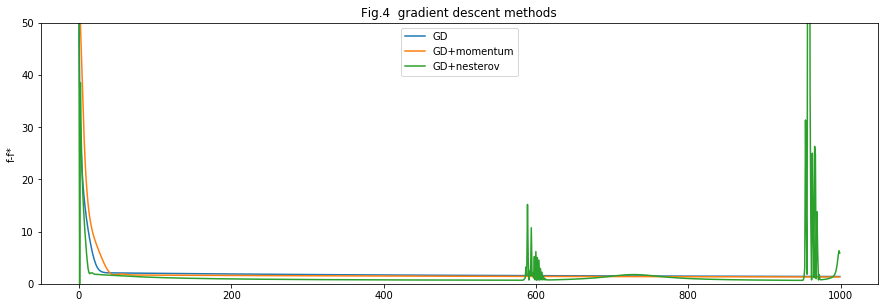

In [118]:
fig4 = plt.figure(figsize=(15, 4.8))
ax1 = fig4.add_subplot(111)
o = Optimize()
x0 = np.array([0.5, 2])
o.minimize(f, df, x0, method="gd", max_iter=1000, momentum=0, learning_rate=0.001)
ax1.plot(range(0, 1000), o.f_val, linestyle = '-', label='GD')
o.minimize(f, df, x0, method="gd", max_iter=1000, momentum=0.9, learning_rate=0.001)
ax1.plot(range(0, 1000), o.f_val, linestyle = '-', label='GD+momentum')
o.minimize(f, df, x0, method="nesterov", max_iter=1000, momentum=0.9, learning_rate=0.001)
ax1.plot(range(0, 1000), o.f_val, linestyle = '-', label='GD+nesterov')
ax1.legend()
plt.title("Fig.4  gradient descent methods")
plt.ylabel("f-f*")
plt.ylim(0, 50)
plt.show()

> **从图中可以看出，nesterov加速存在一定的的抖动，不过整体来看是下降的，momentum方法前边几轮迭代略慢于无momentum的方法，最后结果类似。三种方法都没有收敛到全局最小值0**

(3) Compare vanilla stochastic gradient descent with different adaptive stochastic gradient descent methods, including AdaGrad, RMSprop, and Adam. Plot $f − f^∗$ as a
function of the number of iterations. 

Maximum number of iterations has been exceeded.
min:	[0.99519157]
x:	[-2.36971035  1.31625481]
Maximum number of iterations has been exceeded.
min:	[24.0469536]
x:	[0.23756075 1.76497925]
Maximum number of iterations has been exceeded.
min:	[0.83660805]
x:	[-3.5611127   1.22478844]
Maximum number of iterations has been exceeded.
min:	[1.0056627]
x:	[-2.6095262   1.30782103]


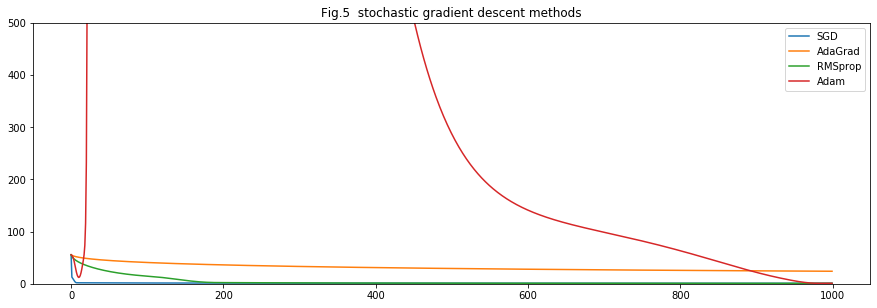

In [113]:
fig5 = plt.figure(figsize=(15, 4.8))
ax1 = fig5.add_subplot(111)
o = Optimize()
x0 = np.array([0.5, 2])
o.minimize(f, df, x0, method="sgd", max_iter=1000, momentum=0, learning_rate=0.005)
ax1.plot(range(0, 1000), o.f_val, linestyle = '-', label='SGD')
o.minimize(f, df, x0, method="ada-grad", max_iter=1000, momentum=0.9, learning_rate=0.005)
ax1.plot(range(0, 1000), o.f_val, linestyle = '-', label='AdaGrad')
o.minimize(f, df, x0, method="rms-prop", max_iter=1000, momentum=0.9, learning_rate=0.005)
ax1.plot(range(0, 1000), o.f_val, linestyle = '-', label='RMSprop')
o.minimize(f, df, x0, method="adam", max_iter=1000, momentum=0.9, learning_rate=0.005, decay_rate=0.9)
ax1.plot(range(0, 1000), o.f_val, linestyle = '-', label='Adam')
ax1.legend()
plt.ylim(0, 500)
plt.title("Fig.5  stochastic gradient descent methods")
plt.show()

> **AdaGrad由于梯度值缩小很快，所以其收敛速度是最慢的，1000轮之后梯度几乎为0；RMSprop相对于AdaGrad来说因为改进了梯度值快速减小的问题，收敛速度比较快；vanilla SGD前几轮速度较快，最后找到的最小值比RMSprop大；Adam前几轮出现抖动，后期修正并快速收敛**

> **以上这些算法都没有找到全局最小值，可能是初始点选得不好，可以尝试从多个起点同时出发，选择其中最好的结果**